# Decision Tree


## Table of Contents
* [Load Modules](#loadmodules)
* [Load Data](#loaddata)
* [Descriptive Modeling](#descriptive)
 * [Feature Selection](#featureselection)
 * [Decision Tree](#tree)

<hr>

### Load Modules<a class="anchor" id="loadmodules"></a>

In [1]:
import pandas as pd

import operator

import itertools

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz 
from sklearn import tree

from statsmodels.stats.outliers_influence import variance_inflation_factor

import cv2

%matplotlib inline
mpl.rcParams['font.size'] = 16.0
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

<hr>

### Load Data<a class="anchor" id="loaddata"></a>

In [2]:
df = pd.read_csv('../Final Code/merged_df.csv')

<hr>

### Descriptive Modeling<a class="anchor" id="descriptive"></a>

<hr>

### Feature Selection<a class="anchor" id="featureselection"></a>

In [67]:
# Select features to evaluate
columns_list = [
# 'County',
# 'ballots_cast',
# 'ballots_rejected',
# 'percent_rejected',

 'Percent_Ballots_Cast_Dem',
 'Percent_Ballots_Cast_Repub',
 'Percent_Ballots_Cast_Unaff',
 'Percent_Ballots_Cast_Other',

# 'Dem_Ballots_Cast',
# 'Other_Ballots_Cast',
# 'Repub_Ballots_Cast',
# 'Unaff_Ballots_Cast',

# 'Dem_Ballots_Rejected',
# 'Other_Ballots_Rejected',
# 'Repub_Ballots_Rejected',
# 'Unaff_Ballots_Rejected',

# 'Percent_Dem_Ballots_Rejected',
# 'Percent_Repub_Ballots_Rejected',
# 'Percent_Other_Ballots_Rejected',
# 'Percent_Unaff_Ballots_Rejected',

 'Percent Hispanic or Latino',
 'Percent White',
 'Percent Black or African American',
 'Percent American Indian and Alaska Native',
 'Percent Asian',
 'Percent Native Hawaiian and Other Pacific Islander',
 'Percent Other Race',
 'Percent Two or more races',

 'percent_english',
 'percent_spanish',
 'percent_other',
 'percent_english_very_well',
 'percent_english_not_very_well',

 'median_earnings',

# 'HS_and_less',
# 'more_than_HS',
 '%HS_and_less',
 'more_than_HS%',

 'Percent 15 to 19 years',
 'Percent 20 to 24 years',
 'Percent 25 to 34 years',
 'Percent 35 to 44 years',
 'Percent 45 to 54 years',
 'Percent 55 to 59 years',
 'Percent 60 to 64 years',
 'Percent 65 to 74 years',
 'Percent 75 to 84 years',
 'Percent 85 years and over',

 'Percent Less than $10,000',
 'Percent $10,000 to $14,999',
 'Percent $15,000 to $24,999',
 'Percent $25,000 to $34,999',
 'Percent $35,000 to $49,999',
 'Percent $50,000 to $74,999',
 'Percent $75,000 to $99,999',
 'Percent $100,000 to $149,999',
 'Percent $150,000 to $199,999',
 'Percent $200,000 or more',
 'Percent below poverty level'
]

<hr>

### Decision Tree<a class="anchor" id="tree"></a>

In [68]:
X=df[columns_list]
y=df['percent_rejected']

In [69]:
# Decision Tree regressor 
regressor = DecisionTreeRegressor(random_state = 0) 

# fit the regressor with X and Y data 
regressor.fit(X, y) 

DecisionTreeRegressor(random_state=0)

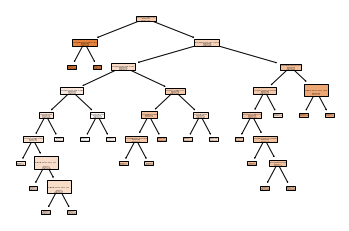

In [70]:
# plt.figure(figsize=(20,20))
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(regressor, feature_names=X.columns, filled=True)
plt.show()

In [71]:
# Using graphviz to display Decision Tree
# export the decision tree to a tree.dot file
export_graphviz(regressor, out_file ='tree.dot', feature_names=X.columns)

In [72]:
! dot -Tpng tree.dot -o tree.png

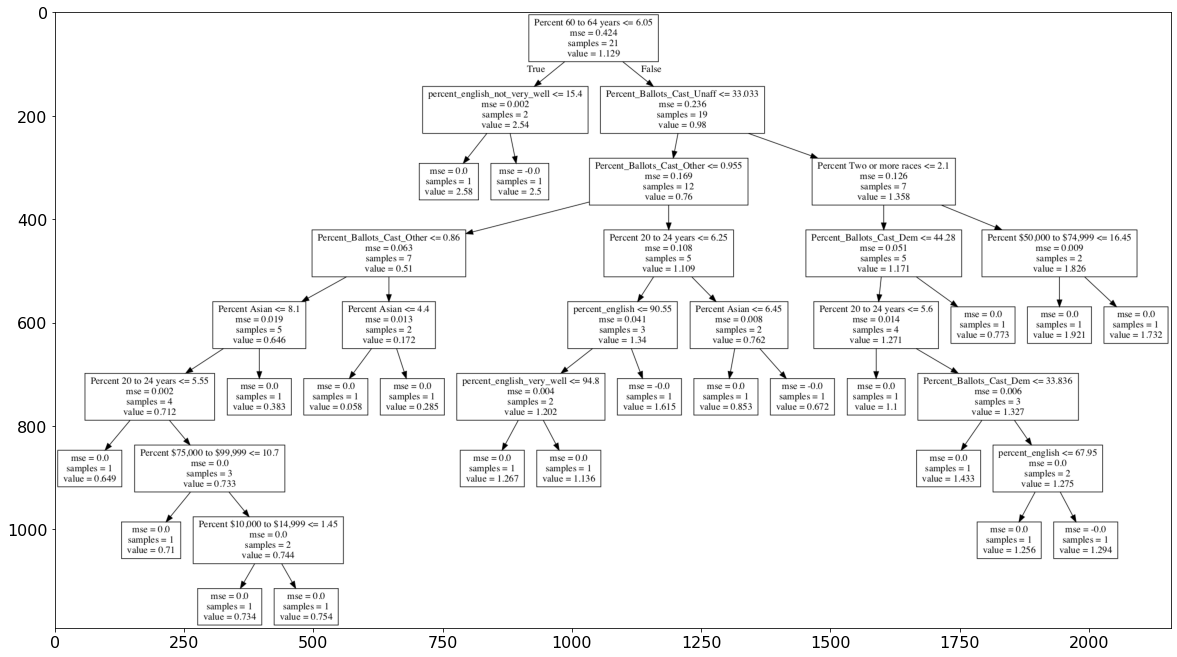

In [73]:
# Dispay Decision Tree
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

In [74]:
cc=list(X.columns)
features = []
importance = []
for i,v in enumerate(regressor.feature_importances_):
    features.append(cc[i])
    importance.append(v)
    #print('Feature: {}, Score: {:.5f}'.format(cc[i],v))

In [75]:
tree_features = pd.DataFrame({"Features":features,"Importance":importance})

In [76]:
tree_features.sort_values(by='Importance', ascending=False).style.hide_index()

Features,Importance
Percent 60 to 64 years,0.494810
Percent_Ballots_Cast_Unaff,0.178055
Percent_Ballots_Cast_Other,0.153370
Percent Two or more races,0.068950
Percent 20 to 24 years,0.049912
Percent_Ballots_Cast_Dem,0.024118
Percent Asian,0.014459
percent_english,0.012889
"Percent $50,000 to $74,999",0.001994
percent_english_very_well,0.000966
